In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from pathlib import Path
sys.path.append(Path.cwd().parent.as_posix())
from dataset import UyghurEnglishDataset
from tokenizers import Tokenizer


tokenizer: Tokenizer = Tokenizer.from_file((Path().cwd().parent.parent / "config" / "./en_ug_mixed_tokenizer.json").as_posix())
my_dataset = UyghurEnglishDataset(tokenizer, (Path().cwd().parent.parent / ".data" / "./train.csv").as_posix())
print("[OK] of load dataset")

[OK] of load dataset


1-10: 9625 samples
11-20: 33229 samples
21-30: 22918 samples
31-40: 16250 samples
41-50: 10481 samples
51-60: 6375 samples
61-70: 4394 samples
71-80: 2806 samples
81-90: 1509 samples
91-100: 975 samples
101-110: 749 samples
111-120: 719 samples
121-130: 396 samples
131-140: 233 samples
141-150: 229 samples
151-160: 189 samples
161-170: 91 samples
171-180: 124 samples
181-190: 53 samples
191-200: 52 samples
201-210: 52 samples
211-220: 50 samples
221-230: 16 samples
231-240: 9 samples
241-250: 22 samples
251-260: 29 samples
261-270: 4 samples
271-280: 6 samples
281-290: 2 samples
291-300: 3 samples


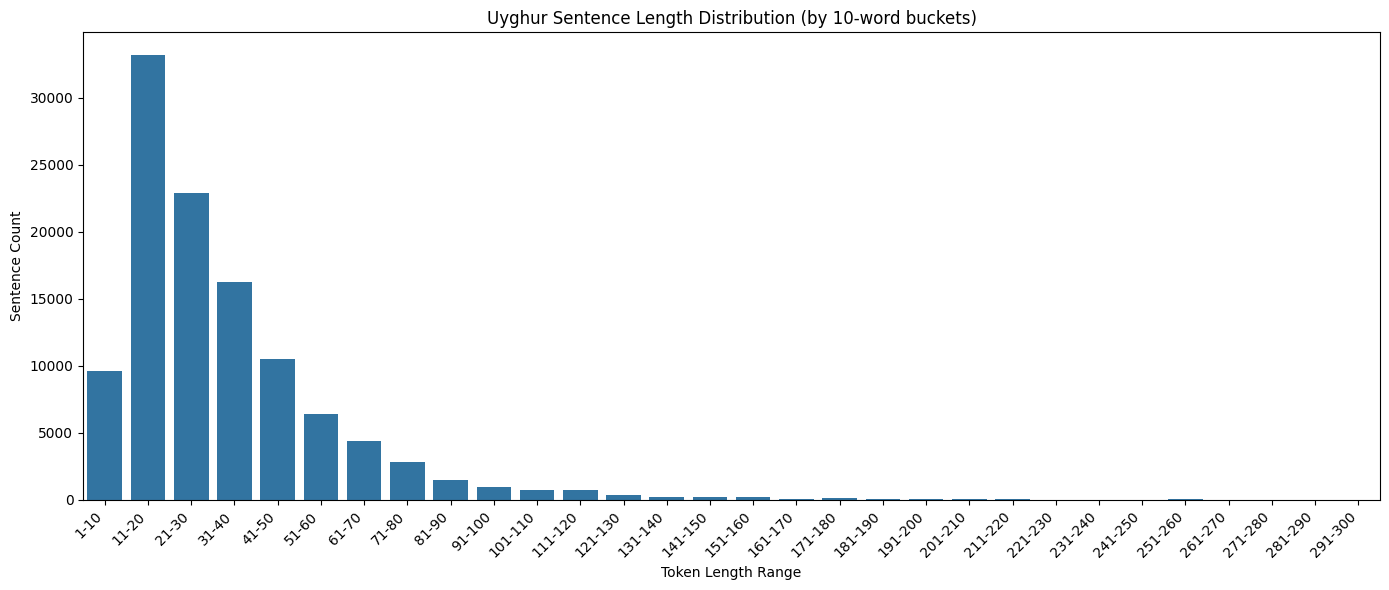

In [4]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simple tokenizer (replace with your tokenizer if needed)
def simple_tokenizer(text):
    return text.strip().split()

# Parameters
side = "uyghur"  # or "english"
bucket_size = 10  # Group sentences into ranges like 1–10, 11–20, ...

# Group lengths into buckets like: 1–10, 11–20, ..., 991–1000
length_buckets = defaultdict(list)

for english, uyghur in my_dataset.data:
    tokens = uyghur if side == "uyghur" else english
    length = len(tokens)
    
    if length == 0:
        continue
    bucket = ((length - 1) // bucket_size) * bucket_size + 1  # Start of bucket
    length_buckets[bucket].append(length)

# Sort buckets for analysis
sorted_buckets = sorted(length_buckets.items())

# Convert to histogram data
bucket_labels = [f"{k}-{k+bucket_size-1}" for k, _ in sorted_buckets]
bucket_counts = [len(v) for _, v in sorted_buckets]

# Print example
for label, count in zip(bucket_labels, bucket_counts):
    print(f"{label}: {count} samples")

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=bucket_labels, y=bucket_counts)
plt.xticks(rotation=45, ha='right')
plt.title(f"{side.capitalize()} Sentence Length Distribution (by {bucket_size}-word buckets)")
plt.xlabel("Token Length Range")
plt.ylabel("Sentence Count")
plt.tight_layout()
plt.show()
